In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_curve
import warnings
#ignoring the wrangings
warnings.filterwarnings('ignore')

## Iris flower classification

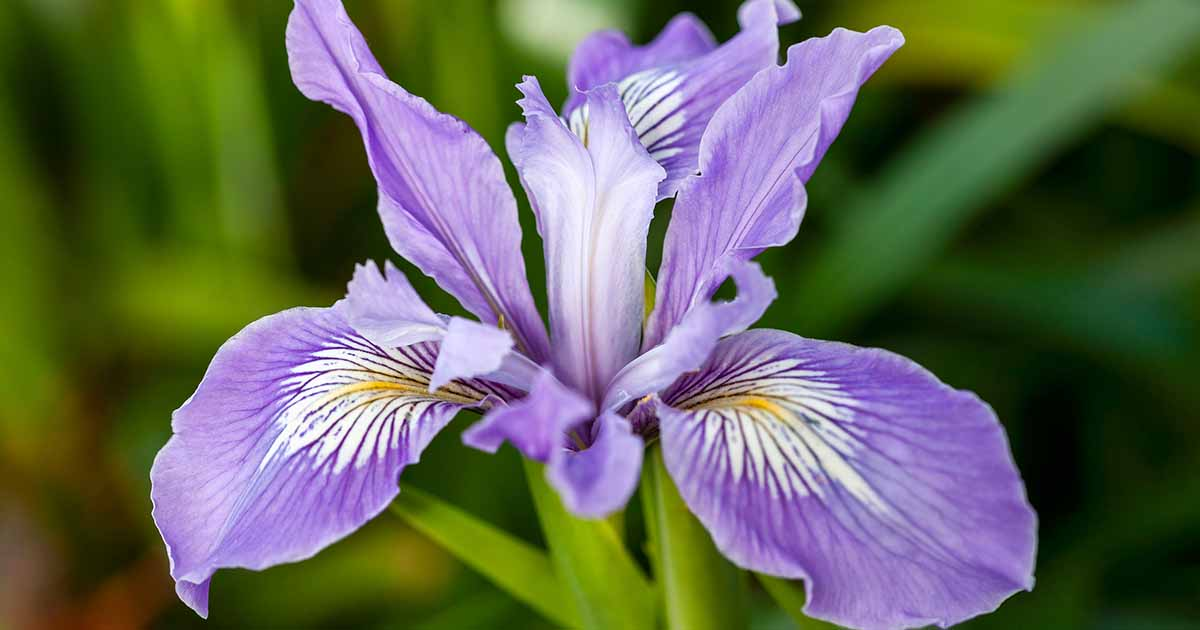

# Data exploration

In [2]:
df=pd.read_csv(r"C:\Users\mohamed\Downloads\data\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
real_data=df.select_dtypes(['int','float'])
real_data=real_data.drop('Id',axis=1)

In [8]:
real_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


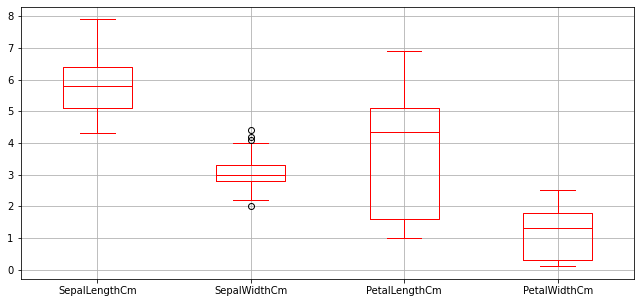

In [9]:
plt.figure(figsize=(11,5))
real_data.boxplot(color='r')
plt.show()

There is no outliers, Nan values, Douplicated values and cols names very simple and clear, cols dtypes are correct

The data are ready to analysis 

# EDA

In [10]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


### Correlation

In [11]:
df.drop('Id',axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


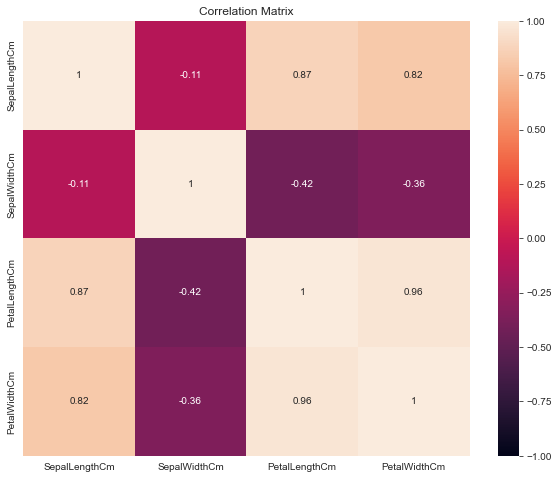

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop('Id',axis=1).corr(),annot=True,vmin=-1,vmax=1)
plt.title("Correlation Matrix")
plt.show()

A strong relationship between SepalWidth and SepalLength and also between PetalWidth and PetalLength 

### Iris Sepal

In [13]:
df[['SepalLengthCm','SepalWidthCm']].describe()

,SepalLengthCm,SepalWidthCm
count,150.000000,150.000000
mean,5.843333,3.054000
std,0.828066,0.433594
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


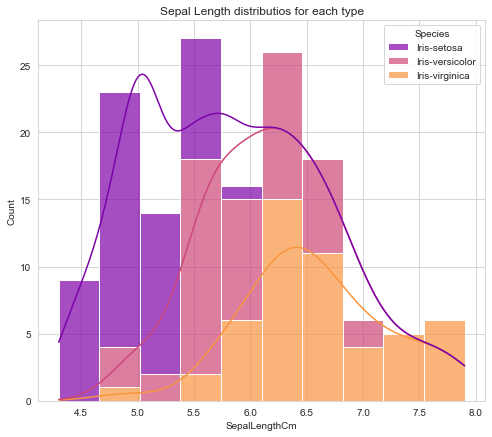

In [14]:
plt.figure(figsize=(8,7))
sns.set_style('whitegrid')
sns.histplot(data=df,x='SepalLengthCm',hue='Species',multiple='stack',bins=10,kde=True,alpha=0.7,palette='plasma')
plt.title("Sepal Length distributios for each type")
plt.show()

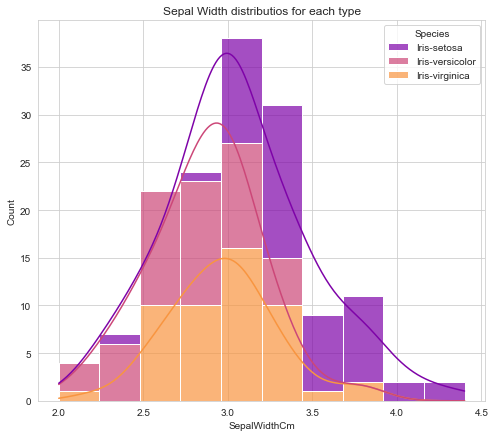

In [15]:
plt.figure(figsize=(8,7))
sns.histplot(data=df,x='SepalWidthCm',hue='Species',multiple='stack',bins=10,kde=True,alpha=0.7,palette='plasma')
plt.title("Sepal Width distributios for each type")
plt.show()

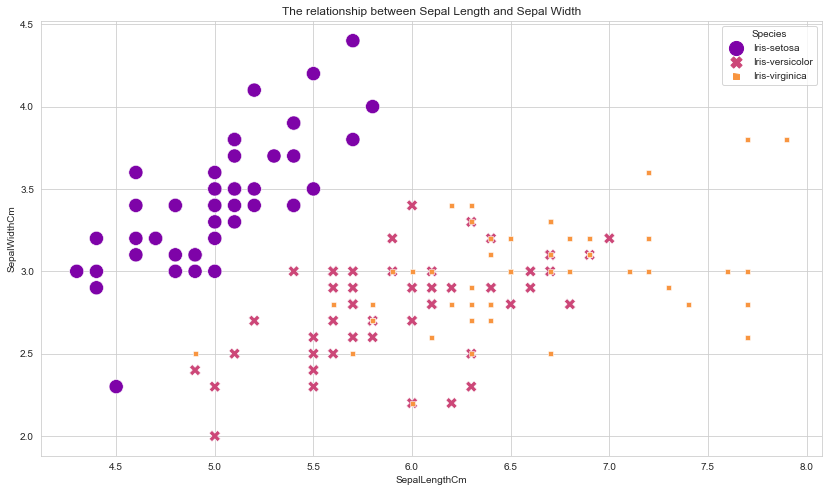

In [16]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df,x='SepalLengthCm',y='SepalWidthCm',hue='Species',style='Species',size='Species',palette='plasma',sizes=(50,200))
plt.title("The relationship between Sepal Length and Sepal Width")
plt.show()

### Iris Petal

In [17]:
df[['PetalLengthCm','PetalWidthCm']].describe()

,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


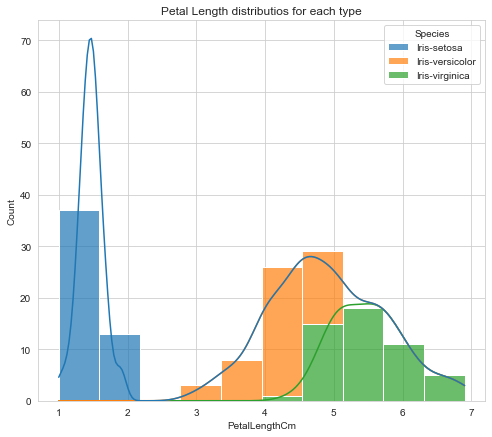

In [18]:
plt.figure(figsize=(8,7))
sns.histplot(data=df,x='PetalLengthCm',hue='Species',multiple='stack',bins=10,kde=True,alpha=0.7)
plt.title("Petal Length distributios for each type")
plt.show()

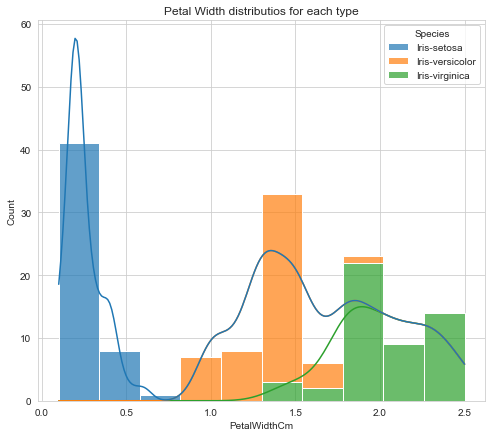

In [19]:
plt.figure(figsize=(8,7))
sns.histplot(data=df,x='PetalWidthCm',hue='Species',multiple='stack',bins=10,kde=True,alpha=0.7)
plt.title("Petal Width distributios for each type")
plt.show()

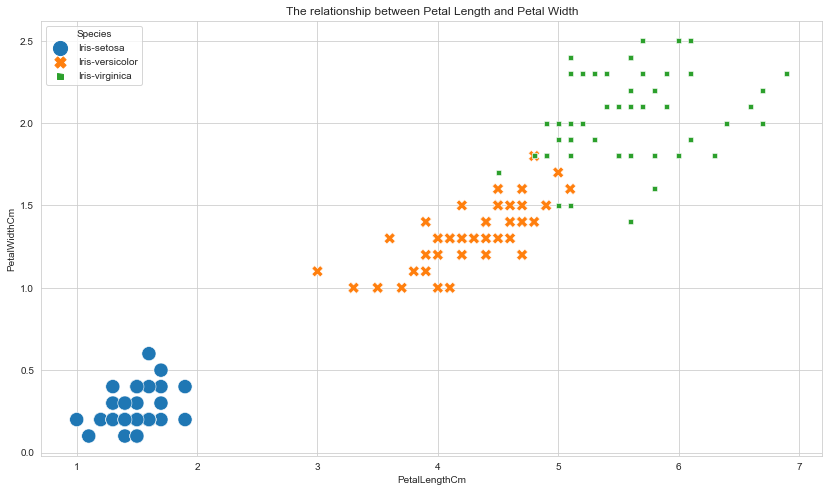

In [20]:
plt.figure(figsize=(14,8))
sns.scatterplot(data=df,x='PetalLengthCm',y='PetalWidthCm',hue='Species',style='Species',size='Species',sizes=(50,200))
plt.title("The relationship between Petal Length and Petal Width")
plt.show()

### Species 

In [21]:
sp_count=df['Species'].value_counts()

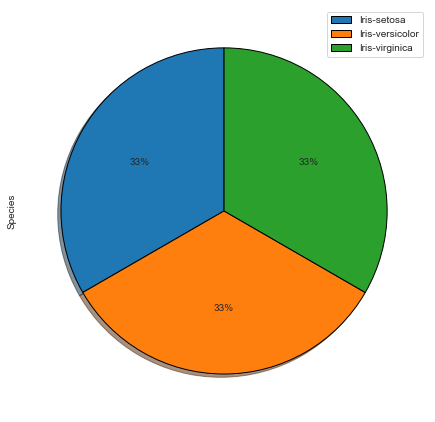

In [22]:
plt.figure(figsize=(7.5,7.5))
sp_count.plot(kind='pie',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},autopct="%1.0f%%",labels=None)
plt.legend(labels=sp_count.index, loc='upper right')
plt.show()

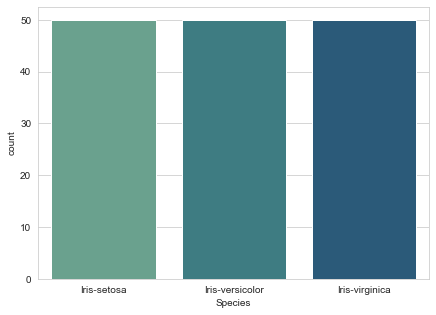

In [23]:
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='Species',palette='crest')
plt.show()

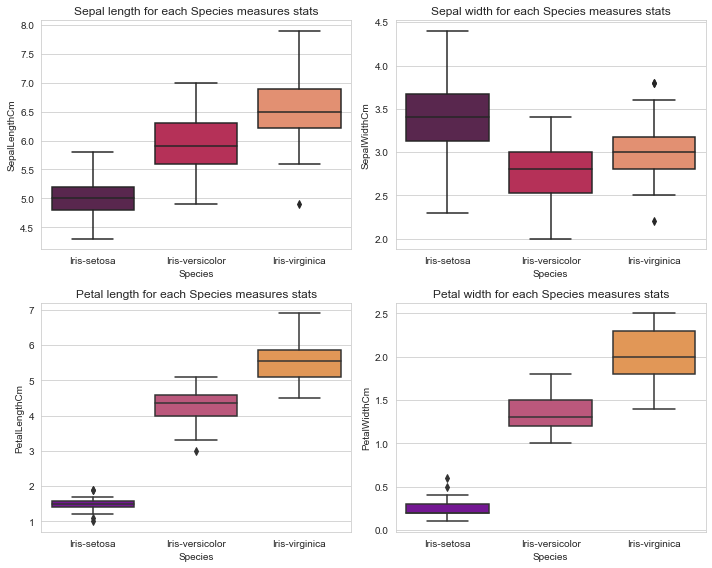

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot on the first subplot (top-left)
sns.boxplot(x='Species',y='SepalLengthCm', data=df, ax=axes[0, 0],palette="rocket")
axes[0, 0].set_title('Sepal length for each Species measures stats')

# Plot on the second subplot (top-right)
sns.boxplot(x='Species',y='SepalWidthCm', data=df, ax=axes[0, 1],palette="rocket")
axes[0, 1].set_title('Sepal width for each Species measures stats')

# Plot on the third subplot (bottom-left)
sns.boxplot(x='Species',y='PetalLengthCm', data=df, ax=axes[1, 0],palette="plasma")
axes[1, 0].set_title('Petal length for each Species measures stats')

# Plot on the fourth subplot (bottom-right)
sns.boxplot(x='Species',y='PetalWidthCm', data=df, ax=axes[1, 1],palette="plasma")
axes[1, 1].set_title('Petal width for each Species measures stats')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

# Model Building

In [27]:
y=df.iloc[:,-1]
x=df.iloc[:,1:-1]

In [28]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [44]:
x_train.shape

(105, 4)

### Model selection and training 

In [36]:
lr=LogisticRegression()

In [37]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
ypred1=lr.predict(x_train)

In [40]:
ypred2=lr.predict(x_test)

### Model evaluation 

In [48]:
print(f"The accuracy score for train set is {accuracy_score(y_train,ypred1)*100} \nThe accuracy score for test set is  {accuracy_score(y_test,ypred2)*100 }")

The accuracy score for train set is 96.19047619047619 
The accuracy score for test set is  95.55555555555556


In [50]:
from sklearn.metrics import confusion_matrix
conf_matrix1 = confusion_matrix(y_test, ypred2)

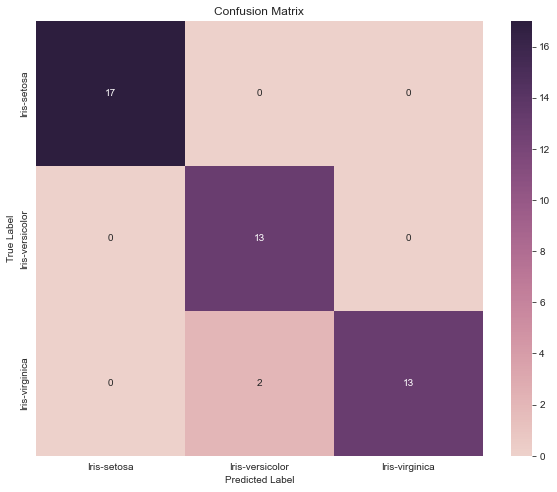

In [56]:

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap=sns.cubehelix_palette(as_cmap=True), xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
print("The classification report :")
target_names = ['Iris-setosa','Iris-virsicolor','Iris-virginica']
print(classification_report(y_test, ypred2,target_names=target_names))

The classification report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-virsicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

